In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import graphviz
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# K-최근접 이웃

이해하기 매우 쉬운 모델

많이 조정하지 않아도 자주 좋은 성능 발휘

모델 빠르게 생성 가능하지만, 훈련 센트가 매우 크면(특성 수나 샘플 수가 매우 클 경우)예측 느려짐

(수백 개 이상의) 많은 특성을 가진 데이터 셋에는 잘 작동X / 특성 값 대부분이 0인희소한 데이터셋에 잘 작동X

KNN 모델 사용을 위해서는 전처리 과정 중요

## k-최근접 이웃 분류

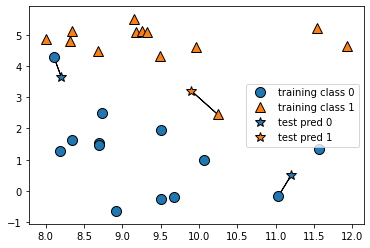

In [2]:
mglearn.plots.plot_knn_classification(n_neighbors=1) #1개 최근접

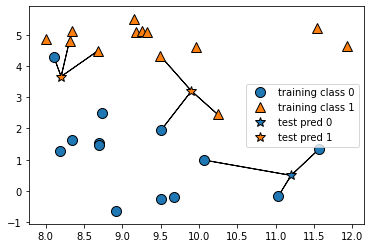

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=3) #3개 최근접

In [7]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

In [9]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
print('테스트 세트 예측:',clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [15]:
print('테스트 세트 정확도: {:.2f}'.format(clf.score(X_test,y_test)))

테스트 세트 정확도: 0.86


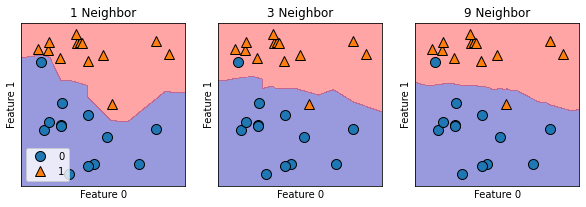

In [18]:
fig, axes = plt.subplots(1,3,figsize=(10,3))

for n_neighbors, ax in zip([1,3,9],axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title('{} Neighbor'.format(n_neighbors))
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
axes[0].legend(loc=3)

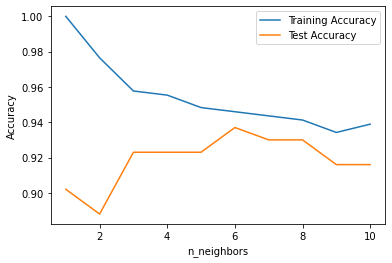

In [19]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=66)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    #모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    #훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train,y_train))
    #일반화 정확도 저장
    test_accuracy.append(clf.score(X_test,y_test))
    
plt.plot(neighbors_settings,training_accuracy,label='Training Accuracy')
plt.plot(neighbors_settings,test_accuracy,label='Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

## k-최근접 이웃 회귀

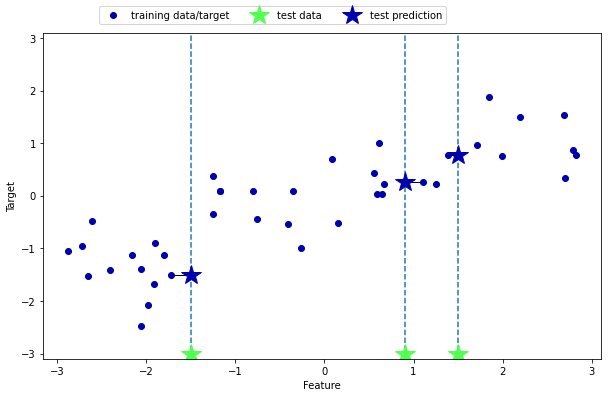

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

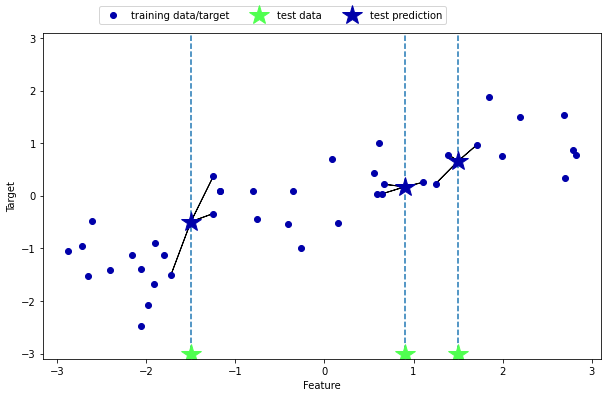

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=3) #이웃 간의 평균으로 예측ㅠ

In [23]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples=40)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [24]:
print('테스트 세트 예측:\n',reg.predict(X_test))

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [25]:
print('테스트 세트 R^2: {:.2f}'.format(reg.score(X_test,y_test)))

테스트 세트 R^2: 0.83


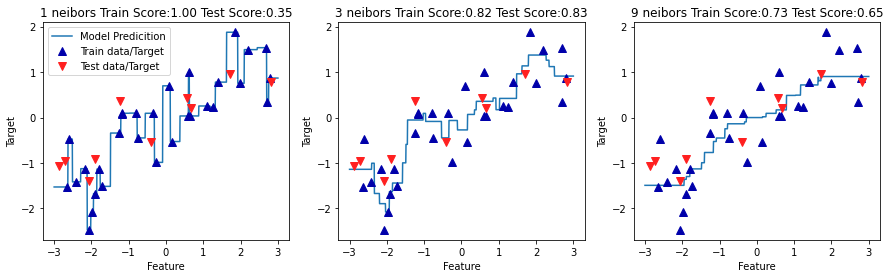

In [27]:
fig, axes = plt.subplots(1,3,figsize=(15,4)) 
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9],axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,y_train,'^',c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test,y_test,'v',c=mglearn.cm2(1),markersize=8)
    
    ax.set_title(
    '{} neibors Train Score:{:.2f} Test Score:{:.2f}'.format(
    n_neighbors,reg.score(X_train,y_train),
    reg.score(X_test,y_test)))
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')
axes[0].legend(['Model Predicition','Train data/Target',
               'Test data/Target'],loc='best')

이웃을 많이 사용하면 훈련 데이터에는 잘 안 맞을 수 있지만 더 안정된 예측 만들 수 있음